# BÀI TIỂU LUẬN GIỮA KÌ – NHẬP MÔN TRÍ TUỆ NHÂN TẠO

**Mã môn học:** 503043  

**Nhóm môn học:** 5  

**Họ tên và MSSV các thành viên:**  
- Bùi Huy Báu – 52300181  
- Nguyễn Hải Đăng – 52300186  
- Nguyễn Thị Minh Hương – 52300201  
- Đặng Ngọc Kim Khánh – 52300208  
- Hàng Thị Anh Thư – 52300260


## 1. Mô tả bài toán & mô hình hoá state space

- **Mô tả bài toán**:  
  Trong trò chơi **8-Puzzle**, người chơi cần di chuyển các ô vuông được đánh số từ `1` đến `8` (và một ô trống `0`) từ **trạng thái ban đầu** bất kỳ đến **một trong các trạng thái đích** cho trước, bằng cách thực hiện các hành động hợp lệ theo luật của trò chơi.


- **Mô hình hoá state space**:  

  - **Trạng thái**: ma trận `3x3` chứa các số `0..8`, trong đó `0` biểu thị ô trống.  

  - **Tập goal** (4 trạng thái theo đề):  
    <p align="center">
      <img src="goal.png" alt="Goal state" width="600"><br>
      <em>Hình 1. Các cấu hình trạng thái đích hợp lệ của 8-Puzzle</em>
    </p>

  - **Hành động** (mỗi bước cost = 1):  
    Sau **một lần di chuyển**, nếu hai ô `A` và `B` thỏa mãn `A + B = 9` và **kề nhau theo hàng hoặc cột**, bạn được phép thực hiện thao tác **swap (đổi chỗ)** chúng.  
    Ngoài ra, bạn có thể **hoán đổi hai ô góc chéo** (ô trống không được swap).  
    Gồm ba loại hành động:  
    - 1. Di chuyển ô trống `U/D/L/R` (nếu hợp lệ).  
    - 2. **Swap** hai ô **kề nhau** theo hàng hoặc cột **thoả mãn** `A + B = 9`.  
    - 3. **Swap góc chéo**: `TL ↔ BR`, `TR ↔ BL`.


## 2. Xây dựng A\* với 2 Heuristic

- **Mô tả thuật toán A\***:  

  Thuật toán **A\*** là một phương pháp **tìm kiếm có thông tin (informed search)**, sử dụng hàm đánh giá:
  $$
  f(n) = g(n) + h(n)
  $$
  - **g(n)**: chi phí thực tế từ trạng thái ban đầu đến n.  
  - **h(n)**: chi phí ước lượng nhỏ nhất từ n đến trạng thái đích (*heuristic*).  

  Tại mỗi bước, **A\*** chọn mở rộng trạng thái có giá trị **f(n)** nhỏ nhất trong hàng đợi ưu tiên (*Priority Queue*).  
  Thuật toán đảm bảo **tìm được lời giải tối ưu** nếu heuristic là **admissible** (không đánh giá vượt quá chi phí thật).  

  - **Quy trình hoạt động**:  
    1. Bắt đầu từ trạng thái khởi tạo, tính `f = g + h` và đưa vào `OPEN`.  
    2. Lặp cho đến khi `OPEN` rỗng hoặc đạt đích:  
       - Lấy nút có `f` nhỏ nhất ra khỏi `OPEN`.  
       - Nếu là đích → dừng, truy vết đường đi.  
       - Sinh các trạng thái kế tiếp (di chuyển, swap, swap góc).  
       - Với mỗi trạng thái mới, tính `g'`, `h'`, `f'` và thêm vào `OPEN` nếu tốt hơn.  


- **Hai heuristic được sử dụng**:  

  - **Heuristic 1 – `h_zero(s) = 0`**  

    - Là heuristic cơ bản (*baseline*), mọi trạng thái đều có giá trị ước lượng bằng `0`.  
    - Khi đó, **A\*** hoạt động tương đương với **Uniform Cost Search (UCS)**.  
    - Đảm bảo cả **admissible** và **consistent**, vì luôn thỏa mãn:  
      $$
      h(n) = 0 \leq h^*(n), \quad h(n) \leq 1 + h(n')
      $$
    - **Mục đích**: dùng làm chuẩn để so sánh hiệu quả với heuristic thứ hai.  

  - **Heuristic 2 – `h_pair(s) = ceil(misplaced(s) / 2)`**  

    - Trong đó `misplaced(s)` là **số lượng ô sai vị trí** của trạng thái `s` so với **4 trạng thái goal hợp lệ**.  
    - Lấy giá trị nhỏ nhất trong bốn cấu hình:  
      \[
      mis = \min_{goal \in Goals} (\text{số ô sai})
      \]
    - Do mỗi bước có thể sửa **tối đa 2 ô** (vì có phép `swap` kề nhau thoả `A + B = 9`),  
      nên số bước tối thiểu để hoàn thành là `ceil(mis / 2)`.  

    - **Tính chất**:  
      **Admissible:** không bao giờ vượt quá số bước thật để đạt đích.  

      $$
      h(s) \leq h^*(s)
      $$

      **Consistent:** mỗi hành động có cost = 1.  

      $$
      h(n) \leq 1 + h(n')
      $$

      (Được kiểm chứng trong các bảng ở phần đánh giá.)

    - **Ý nghĩa**:  
      Heuristic `h_pair` đánh giá sát hơn so với `h_zero`, giúp giảm số lượng trạng thái mở rộng và tăng hiệu quả tìm kiếm.  


#### 💡 Lưu ý trước khi chạy chương trình

**Gợi ý cài Graphviz (nếu muốn xuất PNG):**

- **Windows:**  
  `winget install Graphviz.Graphviz`  
  hoặc  
  `choco install graphviz`  

- **Kiểm tra cài đặt:**  
  `dot -V`  

- **Nếu chưa có PATH**, chỉnh thủ công trong notebook:  
  ```python
  DOT = r"C:\\Program Files\\Graphviz\\bin\\dot.exe"


### CHI TIẾT CHƯƠNG TRÌNH

- ### Thêm các thư viện cần thiết

In [111]:
from __future__ import annotations
from dataclasses import dataclass, field
from typing import Any, Callable, Dict, Iterable, List, Optional, Tuple, Set
import heapq, random, time, os, shutil
from collections import deque
from IPython.display import Image, display

# Kiểu trạng thái
Grid = Tuple[Tuple[int, int, int], Tuple[int, int, int], Tuple[int, int, int]]
State = Tuple[Grid, bool]  # (grid, after_move_flag)

- ### Hỗ trợ Graphviz 'dot' (tự dò dot.exe khi cần)

In [112]:
# Hỗ trợ Graphviz 'dot' (tự dò dot.exe khi cần)\n
def _inject_dot_into_env(dot_path: Optional[str]) -> None:
    if not dot_path:
        return
    if os.path.isdir(dot_path):
        dot_path = os.path.join(dot_path, "dot.exe")
    if os.path.isfile(dot_path):
        dot_dir = os.path.dirname(dot_path)
        os.environ["PATH"] = f"{dot_dir};" + os.environ.get("PATH", "")
        os.environ["GRAPHVIZ_DOT"] = dot_path

def _ensure_dot_available(extra_candidates: Optional[List[str]] = None) -> Optional[str]:
    cur = shutil.which("dot")
    if cur:
        return cur
    candidates = [
        r"C:\\Program Files\\Graphviz\\bin\\dot.exe",
        r"C:\\Program Files (x86)\\Graphviz2.38\\bin\\dot.exe",
        os.path.join(os.environ.get("CONDA_PREFIX", ""), r"Library\\bin\\dot.exe"),
    ]
    if extra_candidates:
        candidates = extra_candidates + candidates
    for p in candidates:
        if p and os.path.isfile(p):
            _inject_dot_into_env(p)
            return p
    return None

- ### Các hàm hỗ trợ (helper functions) cho bài toán 8-Puzzle

In [113]:
# Utilities (8-puzzle)\n
def find_pos(g: Grid, val: int) -> Tuple[int, int]:
    for i in range(3):
        for j in range(3):
            if g[i][j] == val:
                return (i, j)
    raise ValueError("Value not found")

def swap_cells(g: Grid, p1: Tuple[int, int], p2: Tuple[int, int]) -> Grid:
    (i1, j1), (i2, j2) = p1, p2
    lst = [list(row) for row in g]
    lst[i1][j1], lst[i2][j2] = lst[i2][j2], lst[i1][j1]
    return tuple(tuple(row) for row in lst)

def move_blank(g: Grid, direction: str) -> Optional[Grid]:
    di = {"U": -1, "D": 1, "L": 0, "R": 0}
    dj = {"U": 0, "D": 0, "L": -1, "R": 1}
    bi, bj = find_pos(g, 0)
    ni, nj = bi + di[direction], bj + dj[direction]
    if 0 <= ni < 3 and 0 <= nj < 3:
        return swap_cells(g, (bi, bj), (ni, nj))
    return None

def grid_of(state: State) -> Grid:
    return state[0]

def flag_of(state: State) -> bool:
    return state[1]

def make_state(grid: Grid, after_move: bool) -> State:
    return (grid, after_move)

- ### Định nghĩa Problem + 8-Puzzle theo đúng luật đề

In [ ]:
@dataclass(frozen=True)
class Action:
    kind: str  # "move" | "swap9" | "swap_corners" | "Pass"
    detail: str
    def __str__(self) -> str:
        return f"{self.kind}:{self.detail}"

class Problem:
    def __init__(self, initial: Any):
        self.initial = initial

    def is_goal(self, state: Any) -> bool: ...
    def actions(self, state: Any) -> Iterable[Action]: ...
    def result(self, state: Any, action: Action) -> Any: ...
    def step_cost(self, state: Any, action: Action, next_state: Any) -> float:
        return 1.0  # mỗi hành động = 1

class EightPuzzleProblem(Problem):
    def __init__(self, initial_grid: Grid, goals: Optional[List[Grid]] = None):
        # initial là (grid, after_move=False): khi bắt đầu chưa được swap
        super().__init__(make_state(initial_grid, False))
        if goals is None:
            self.goals: List[Grid] = [
                ((1,2,3), (4,5,6), (7,8,0)),
                ((8,7,6), (5,4,3), (2,1,0)),
                ((0,1,2), (3,4,5), (6,7,8)),
                ((0,8,7), (6,5,4), (3,2,1)),
            ]
        else:
            self.goals = goals

    def is_goal(self, state: State) -> bool:
        return grid_of(state) in self.goals

    def actions(self, state: State) -> Iterable[Action]:
        g = grid_of(state)
        after_move = flag_of(state)

        # 1) Luôn có thể thử MOVE (nếu hợp lệ)
        for d in ("U", "D", "L", "R"):
            if move_blank(g, d) is not None:
                yield Action("move", d)

        # 2) after_move=True mới được SWAP
        if after_move:
            # 2a) Swap kề nhau thoả A+B=9 (không swap 0)
            dirs = [(1,0), (-1,0), (0,1), (0,-1)]
            for i in range(3):
                for j in range(3):
                    a = g[i][j]
                    if a == 0:
                        continue
                    for di, dj in dirs:
                        ni, nj = i + di, j + dj
                        if 0 <= ni < 3 and 0 <= nj < 3:
                            b = g[ni][nj]
                            if b != 0 and a + b == 9 and (i, j) < (ni, nj):
                                yield Action("swap9", f"({i},{j})<->({ni},{nj})")
            # 2b) Swap góc chéo (không có 0 ở góc)
            corners = {"TL_BR": ((0,0), (2,2)), "TR_BL": ((0,2), (2,0))}
            for name, ((i1,j1),(i2,j2)) in corners.items():
                if g[i1][j1] != 0 and g[i2][j2] != 0:
                    yield Action("swap_corners", name)

    def result(self, state: State, action: Action) -> State:
        g = grid_of(state)
        after_move = flag_of(state)

        if action.kind == "move":
            nxt = move_blank(g, action.detail)
            assert nxt is not None
            return make_state(nxt, True)

        elif action.kind == "swap9":
            # chỉ hợp lệ khi after_move=True
            lhs, rhs = action.detail.split("<->")
            i, j   = map(int, lhs.strip()[1:-1].split(","))
            ni, nj = map(int, rhs.strip()[1:-1].split(","))
            g2 = swap_cells(g, (i,j), (ni,nj))
            # Sau swap → KHÔNG còn “after_move”
            return make_state(g2, False)

        elif action.kind == "swap_corners":
            if action.detail == "TL_BR":
                g2 = swap_cells(g, (0,0), (2,2))
            else:
                g2 = swap_cells(g, (0,2), (2,0))
            return make_state(g2, False)

        else:
            raise ValueError("Unknown action")

- ### Node + Heuristics 

In [ ]:
@dataclass(order=True)
class Node:
    f: float
    id: int = field(compare=False)
    state: State = field(compare=False)
    g: float = field(compare=False, default=0.0)
    parent: Optional["Node"] = field(compare=False, default=None)
    action: Optional[Action] = field(compare=False, default=None)

    def path(self) -> List["Node"]:
        cur: Optional[Node] = self
        out: List[Node] = []
        while cur is not None:
            out.append(cur)
            cur = cur.parent
        return out[::-1]

# =========================
# Heuristics (2 cái theo đề)
# =========================
def misplaced_tiles_min_over_goals(g: Grid, goals: List[Grid]) -> int:
    best = 9
    for goal in goals:
        cnt = 0
        for i in range(3):
            for j in range(3):
                if g[i][j] != 0 and g[i][j] != goal[i][j]:
                    cnt += 1
        best = min(best, cnt)
    return best

def h_zero(state: State, problem: EightPuzzleProblem) -> float:
    # Không phụ thuộc cờ
    return 0.0

def h_pair(state: State, problem: EightPuzzleProblem) -> float:
    g = grid_of(state)
    mis = misplaced_tiles_min_over_goals(g, problem.goals)
    return float((mis + 1) // 2)

- ### A* tổng quát

In [ ]:
class AStar:
    def __init__(self, problem: Problem, heuristic: Callable[[Any, Problem], float]):
        self.problem = problem
        self.heuristic = heuristic
        self._next_id = 0
        self.expanded_nodes = 0
        self.trace_edges: List[Tuple[int, int, str]] = []  # (parent_id, child_id, action_str)
        self._id2state: Dict[int, State] = {}

    def _new_id(self) -> int:
        self._next_id += 1
        return self._next_id

    def solve(self, max_expansions: Optional[int] = None) -> Optional[Node]:
        start = Node(f=0.0, id=self._new_id(), state=self.problem.initial, g=0.0, parent=None, action=None)
        start.f = start.g + self.heuristic(start.state, self.problem)
        self._id2state[start.id] = start.state

        frontier: List[Node] = []
        heapq.heappush(frontier, start)

        g_best: Dict[State, float] = {start.state: 0.0}
        closed: Set[State] = set()

        while frontier:
            cur = heapq.heappop(frontier)
            if self.problem.is_goal(cur.state):
                return cur
            if cur.state in closed:
                continue
            closed.add(cur.state)

            self.expanded_nodes += 1
            if max_expansions is not None and self.expanded_nodes >= max_expansions:
                return None

            for act in self.problem.actions(cur.state):
                nxt_state = self.problem.result(cur.state, act)
                new_g = cur.g + self.problem.step_cost(cur.state, act, nxt_state)
                if nxt_state in g_best and new_g >= g_best[nxt_state]:
                    continue
                g_best[nxt_state] = new_g
                child = Node(f=0.0, id=self._new_id(), state=nxt_state, g=new_g, parent=cur, action=act)
                child.f = child.g + self.heuristic(child.state, self.problem)
                self._id2state[child.id] = child.state
                heapq.heappush(frontier, child)
                self.trace_edges.append((cur.id, child.id, str(act)))
        return None
    def export_search_tree_dot(self, limit_edges: int = 100) -> str:
        lines = ["digraph G {", '  node [shape=box, fontsize=10];']
        used_nodes: Set[int] = set()
        def state_label(state: Grid) -> str:
            flat = sum(state, ())
            return "\\n".join([
                f"{flat[0]} {flat[1]} {flat[2]}",
                f"{flat[3]} {flat[4]} {flat[5]}",
                f"{flat[6]} {flat[7]} {flat[8]}",
            ])
        for (p, c, a) in self.trace_edges[:limit_edges]:
            used_nodes.add(p); used_nodes.add(c)
            lines.append(f'  {p} -> {c} [label="{a}", fontsize=9];')
        for nid in used_nodes:
            st = self._id2state.get(nid)
            if st is not None:
                lbl = state_label(st)
                lines.append(f'  {nid} [label="{lbl}"];')
        lines.append("}"); return "\n".join(lines)


- ### BFS 

In [117]:
# =========================
# BFS (để tính h* và so sánh)
# =========================
class BFS:
    def __init__(self, problem: Problem):
        self.problem = problem
        self.expanded_nodes = 0

    def solve(self, max_expansions: Optional[int] = None) -> Optional[Node]:
        start = Node(f=0.0, id=0, state=self.problem.initial, g=0.0, parent=None, action=None)
        q = deque([start])
        visited: Set[State] = {start.state}
        while q:
            cur = q.popleft()
            if self.problem.is_goal(cur.state):
                return cur
            self.expanded_nodes += 1
            if max_expansions is not None and self.expanded_nodes >= max_expansions:
                return None
            for act in self.problem.actions(cur.state):
                nxt = self.problem.result(cur.state, act)
                if nxt not in visited:
                    visited.add(nxt)
                    child = Node(f=0.0, id=0, state=nxt, g=cur.g + 1, parent=cur, action=act)
                    q.append(child)
        return None

- ### Sinh trạng thái ngẫu nhiên từ 1 goal + khung thí nghiệm

In [118]:
# =========================
# Sinh trạng thái ngẫu nhiên 
# =========================
def random_state_from_goal(problem: EightPuzzleProblem, steps: int = 50, seed: Optional[int] = None) -> State:
    rnd = random.Random(seed)
    g0 = rnd.choice(problem.goals)
    s: State = make_state(g0, False)  # chưa được swap
    for _ in range(steps):
        acts = list(problem.actions(s))
        if not acts:
            break
        a = rnd.choice(acts)
        s = problem.result(s, a)
    return s

from dataclasses import dataclass
@dataclass
class RunStats:
    found: bool; path_cost: Optional[int]; expanded: int; elapsed_sec: float

def run_once_with_solver(solver_factory: Callable[[], Any]) -> RunStats:
    t0 = time.perf_counter(); solver = solver_factory()
    if isinstance(solver, AStar):
        goal = solver.solve(); elapsed = time.perf_counter() - t0
        return RunStats(goal is not None, None if goal is None else int(goal.g), solver.expanded_nodes, elapsed)
    elif isinstance(solver, BFS):
        goal = solver.solve(); elapsed = time.perf_counter() - t0
        return RunStats(goal is not None, None if goal is None else int(goal.g), solver.expanded_nodes, elapsed)
    else: raise ValueError("Unknown solver")

def experiment_compare(initial_states: List[Any],
                       goals: Optional[List[Grid]] = None) -> Dict[str, List[RunStats]]:
    results: Dict[str, List[RunStats]] = {"A*_h0": [], "A*_hpair": [], "BFS": []}
    for s in initial_states:
        # Nhận cả Grid hoặc State
        if isinstance(s, tuple) and len(s) == 2 and isinstance(s[1], bool):
            initial_grid: Grid = grid_of(s)   # State -> Grid
        else:
            initial_grid = s                  # đã là Grid

        prob = EightPuzzleProblem(initial_grid, goals=goals)

        # A* với h_zero (baseline)
        results["A*_h0"].append(
            run_once_with_solver(lambda p=prob: AStar(p, h_zero))
        )
        # A* với h_pair
        results["A*_hpair"].append(
            run_once_with_solver(lambda p=prob: AStar(p, h_pair))
        )
        # BFS
        results["BFS"].append(
            run_once_with_solver(lambda p=prob: BFS(p))
        )
    return results


def summarize_results(results: Dict[str, List[RunStats]]) -> Dict[str, Dict[str, float]]:
    summary: Dict[str, Dict[str, float]] = {}
    for name, stats in results.items():
        founds = [s for s in stats if s.found]
        summary[name] = {
            "trials": float(len(stats)),
            "found_rate": float(len(founds)) / max(1, len(stats)),
            "avg_cost": (sum(s.path_cost for s in founds if s.path_cost is not None) / max(1, len(founds))) if founds else float("nan"),
            "avg_expanded": sum(s.expanded for s in stats) / max(1, len(stats)),
            "avg_time_ms": 1000.0 * (sum(s.elapsed_sec for s in stats) / max(1, len(stats))),
        }
    return summary

def print_table_from_summary(title: str, summary: Dict[str, Dict[str, float]]) -> None:
    print(f"\nBẢNG 4 — {title}")
    print("=" * 90)
    print(f"{'Thuật toán':<26}{'Trials':>8}{'Found%':>10}{'Avg Cost':>12}{'Avg Expanded':>15}{'Avg Time (ms)':>15}")
    print("-" * 90)
    order = ["A*_h0", "A*_hpair", "BFS"]
    for k in order:
        if k in summary:
            row = summary[k]
            print(f"{k:<26}{row['trials']:>8.0f}{row['found_rate']*100:>9.1f}%{row['avg_cost']:>12.2f}{row['avg_expanded']:>15.2f}{row['avg_time_ms']:>15.2f}")
    for k, row in summary.items():
        if k not in order:
            print(f"{k:<26}{row['trials']:>8.0f}{row['found_rate']*100:>9.1f}%{row['avg_cost']:>12.2f}{row['avg_expanded']:>15.2f}{row['avg_time_ms']:>15.2f}")
    print("=" * 90)

- ### In trạng thái/đường đi + Đánh giá heuristic

In [119]:
# =========================
# In & Đánh giá
# =========================
def print_grid(g: Grid) -> None:
    for i in range(3):
        print(" ".join(str(x) for x in g[i]))
    print()

def print_solution(node: Optional[Node]) -> None:
    if node is None:
        print("No solution.")
        return
    path = node.path()
    print(f"Path length (cost): {int(path[-1].g)}  |  steps = {len(path)-1}")
    for k, nd in enumerate(path):
        g = grid_of(nd.state)
        print(f"Step {k}:")
        print_grid(g)
        if nd.action:
            print(f"Action: {nd.action}")
            print("-"*20)

def bfs_optimal_cost_from_state(problem: EightPuzzleProblem, start_state: State) -> int:
    """h*(n): chi phí tối ưu từ start_state (luật mới)."""
    q = deque([(start_state, 0)])
    seen = {start_state}
    while q:
        s, d = q.popleft()
        if problem.is_goal(s):
            return d
        for act in problem.actions(s):
            ns = problem.result(s, act)
            if ns not in seen:
                seen.add(ns)
                q.append((ns, d + 1))
    return float("inf")

def evaluate_admissibility_along_path(problem: EightPuzzleProblem,
                                      heuristic: Callable[[State, EightPuzzleProblem], float],
                                      solution_node: Node) -> List[dict]:
    print("\nBẢNG — ADMISSIBLE (h(n) ≤ h*(n)) DỌC THEO ĐƯỜNG ĐI NGHIỆM")
    print("=" * 80)
    print(f"{'Bước':<8}{'h(n)':<12}{'h*(n) = cost tối ưu':<24}{'Kết luận'}")
    print("-" * 80)
    rows: List[dict] = []
    for k, nd in enumerate(solution_node.path()):
        h_n = heuristic(nd.state, problem)
        h_star = bfs_optimal_cost_from_state(problem, nd.state)
        ok = h_n <= h_star
        rows.append({"step": k, "h": h_n, "h_star": h_star, "ok": ok})
        print(f"{k:<8}{int(h_n):<12}{h_star:<24}{'Đúng' if ok else 'Sai'}")
    print("=" * 80)
    return rows

def evaluate_consistency_for_state(problem: EightPuzzleProblem,
                                   heuristic: Callable[[State, EightPuzzleProblem], float],
                                   state: State) -> List[dict]:
    print("\nBẢNG — CONSISTENT TẠI 1 TRẠNG THÁI (h(n) ≤ 1 + h(n'))")
    print("=" * 110)
    print("{:<10}{:<10}{:<12}{:<14}{:<12}{}".format(
        "Kế thừa", "h(n)", "h(n')", "1 + h(n')", "Kết luận", "Hành động"
    ))
    print("-" * 110)
    rows: List[dict] = []
    h_n = heuristic(state, problem)
    idx = 0
    for act in problem.actions(state):
        nstate = problem.result(state, act)
        h_np = heuristic(nstate, problem)
        consistent = h_n <= 1 + h_np
        idx += 1
        rows.append({"k": idx, "action": str(act), "h_n": h_n, "h_np": h_np, "ok": consistent})
        print("{:<10}{:<10}{:<12}{:<14}{:<12}{}".format(
            idx, int(h_n), int(h_np), int(1 + h_np), "Đúng" if consistent else "Sai", act
        ))
    print("=" * 110)
    return rows

def evaluate_consistency_along_path(problem: EightPuzzleProblem,
                                    heuristic: Callable[[State, EightPuzzleProblem], float],
                                    solution_node: Node,
                                    max_steps: int = 8) -> List[List[dict]]:
    print(f"\nBẢNG — CONSISTENT TRÊN {max_steps} BƯỚC ĐẦU CỦA ĐƯỜNG ĐI NGHIỆM")
    all_rows: List[List[dict]] = []
    path = solution_node.path()
    upto = min(len(path), max_steps)
    for k in range(upto):
        print(f"\n--- Trạng thái tại bước {k} ---")
        rows = evaluate_consistency_for_state(problem, heuristic, path[k].state)
        all_rows.append(rows)
    return all_rows

## 3. Demo (A* với 2 heuristic & BFS)

In [120]:
STEPS = 40
SEED  = 123
tmp_prob_for_rand = EightPuzzleProblem(((1,2,3),(4,5,6),(7,8,0)))
initial_state = random_state_from_goal(tmp_prob_for_rand, steps=STEPS, seed=SEED)
problem = EightPuzzleProblem(grid_of(initial_state))

print("=== Initial (randomized) ===")
print_grid(grid_of(problem.initial))

=== Initial (randomized) ===
8 6 2
5 0 7
4 3 1



In [121]:
print("=== A* with h_pair ===")
astar = AStar(problem, h_pair)
goal = astar.solve()
print_solution(goal)
print(f"Expanded nodes: {astar.expanded_nodes}")

=== A* with h_pair ===
Path length (cost): 10  |  steps = 10
Step 0:
8 6 2
5 0 7
4 3 1

Step 1:
8 0 2
5 6 7
4 3 1

Action: move:U
--------------------
Step 2:
8 2 0
5 6 7
4 3 1

Action: move:R
--------------------
Step 3:
8 2 7
5 6 0
4 3 1

Action: move:D
--------------------
Step 4:
8 2 7
5 0 6
4 3 1

Action: move:L
--------------------
Step 5:
8 2 7
0 5 6
4 3 1

Action: move:L
--------------------
Step 6:
8 2 7
4 5 6
0 3 1

Action: move:D
--------------------
Step 7:
1 2 7
4 5 6
0 3 8

Action: swap_corners:TL_BR
--------------------
Step 8:
1 2 7
4 5 6
3 0 8

Action: move:R
--------------------
Step 9:
1 2 3
4 5 6
7 0 8

Action: swap_corners:TR_BL
--------------------
Step 10:
1 2 3
4 5 6
7 8 0

Action: move:R
--------------------
Expanded nodes: 3139


In [122]:
print("=== A* with h_zero ===")
astar0 = AStar(problem, h_zero)
goal0 = astar0.solve()
print_solution(goal0)
print(f"Expanded nodes: {astar0.expanded_nodes}")


=== A* with h_zero ===


Path length (cost): 10  |  steps = 10
Step 0:
8 6 2
5 0 7
4 3 1

Step 1:
8 0 2
5 6 7
4 3 1

Action: move:U
--------------------
Step 2:
8 2 0
5 6 7
4 3 1

Action: move:R
--------------------
Step 3:
8 2 7
5 6 0
4 3 1

Action: move:D
--------------------
Step 4:
8 2 7
5 0 6
4 3 1

Action: move:L
--------------------
Step 5:
8 2 7
0 5 6
4 3 1

Action: move:L
--------------------
Step 6:
8 2 7
4 5 6
0 3 1

Action: move:D
--------------------
Step 7:
8 2 7
4 5 6
3 0 1

Action: move:R
--------------------
Step 8:
1 2 7
4 5 6
3 0 8

Action: swap_corners:TL_BR
--------------------
Step 9:
1 2 7
4 5 6
3 8 0

Action: move:R
--------------------
Step 10:
1 2 3
4 5 6
7 8 0

Action: swap_corners:TR_BL
--------------------
Expanded nodes: 19133


In [123]:
print("=== BFS ===")
bfs_solver = BFS(problem)
goal_b = bfs_solver.solve()
print_solution(goal_b)
print(f"Expanded nodes: {bfs_solver.expanded_nodes}")

=== BFS ===
Path length (cost): 10  |  steps = 10
Step 0:
8 6 2
5 0 7
4 3 1

Step 1:
8 0 2
5 6 7
4 3 1

Action: move:U
--------------------
Step 2:
8 2 0
5 6 7
4 3 1

Action: move:R
--------------------
Step 3:
8 2 7
5 6 0
4 3 1

Action: move:D
--------------------
Step 4:
8 2 7
5 0 6
4 3 1

Action: move:L
--------------------
Step 5:
8 2 7
0 5 6
4 3 1

Action: move:L
--------------------
Step 6:
8 2 7
4 5 6
0 3 1

Action: move:D
--------------------
Step 7:
8 2 7
4 5 6
3 0 1

Action: move:R
--------------------
Step 8:
1 2 7
4 5 6
3 0 8

Action: swap_corners:TL_BR
--------------------
Step 9:
1 2 7
4 5 6
3 8 0

Action: move:R
--------------------
Step 10:
1 2 3
4 5 6
7 8 0

Action: swap_corners:TR_BL
--------------------
Expanded nodes: 19551


## 4. Đánh giá heuristic 

- **Các bảng thực nghiệm**:  

  - **BẢNG A1**: Admissible cho `h_pair` (dọc theo đường đi nghiệm).  
  - **BẢNG A2**: Consistent cho `h_pair` (trên K trạng thái đầu đường đi nghiệm).  
  - **BẢNG B1**: Admissible cho `h_zero`.  
  - **BẢNG B2**: Consistent cho `h_zero`.  


- **Đánh giá Admissible của Heuristic**:  

  - **Định nghĩa**:  
    Một heuristic \( h(n) \) là **admissible** nếu nó không bao giờ đánh giá cao hơn chi phí thực tế tối ưu đến đích:  

    $$
    h(n) \leq h^*(n)
    $$

    Với:  
    - \( h(n) \): giá trị heuristic của trạng thái \( n \).  
    - \( h^*(n) \): chi phí thực sự từ \( n \) đến trạng thái đích (*cost-to-go*).  

  - **Các bước thực hiện kiểm tra Admissibility**:  
    1. Chạy thuật toán **A\*** để tìm đường đi tối ưu từ trạng thái ban đầu đến một trong các trạng thái đích.  
    2. Lưu lại giá trị heuristic \( h(n) \) của từng trạng thái được mở rộng.  
    3. Sử dụng thuật toán **BFS** để tính chi phí tối ưu \( h^*(n) \) từ trạng thái đó đến đích.  
    4. So sánh từng giá trị:  
       - Nếu \( h(n) \leq h^*(n) \) với mọi trạng thái \( n \) → heuristic là **admissible**.  
       - Nếu tồn tại bất kỳ trạng thái nào có \( h(n) > h^*(n) \) → heuristic **không admissible**.  


- **Đánh giá Consistency của Heuristic**:  

  - **Định nghĩa**:  
    Một heuristic \( h(n) \) được gọi là **consistent** (hay **monotonic**) nếu nó thỏa mãn bất đẳng thức tam giác:  

    $$
    h(n) \leq c(n, n') + h(n')
    $$

    Với:  
    - \( h(n) \): giá trị heuristic tại trạng thái \( n \).  
    - \( n' \): một successor của \( n \).  
    - \( c(n, n') \): chi phí thực tế từ \( n \) đến \( n' \).  
    - \( h(n') \): giá trị heuristic tại successor \( n' \).  

  - **Các bước thực hiện kiểm tra Consistency**:  
    1. Trong quá trình chạy **A\***, với mỗi trạng thái \( n \) được mở rộng:  
    2. Lấy tất cả các successor \( n' \) của nó.  
    3. Kiểm tra điều kiện consistency:  
        - Nếu $h(n) \leq c(n, n') + h(n')$ luôn đúng → **Heuristic là consistent**.  
        - Nếu có bất kỳ trạng thái nào vi phạm → **Heuristic không consistent**.  



In [124]:
K = 8  # số bước đầu để kiểm tra consistency

if goal is not None:
    print("\n### Heuristic: h_pair")
    print("BẢNG A1 — Admissible (h(n) ≤ h*(n)) — h_pair")
    _ = evaluate_admissibility_along_path(problem, h_pair, goal)
    print(f"BẢNG A2 — Consistent (h(n) ≤ 1 + h(n')) trên {K} bước đầu — h_pair")
    _ = evaluate_consistency_along_path(problem, h_pair, goal, max_steps=K)
else:
    print("Không có lời giải (h_pair) để đánh giá.")



### Heuristic: h_pair
BẢNG A1 — Admissible (h(n) ≤ h*(n)) — h_pair

BẢNG — ADMISSIBLE (h(n) ≤ h*(n)) DỌC THEO ĐƯỜNG ĐI NGHIỆM
Bước    h(n)        h*(n) = cost tối ưu     Kết luận
--------------------------------------------------------------------------------
0       3           10                      Đúng
1       3           9                       Đúng
2       3           8                       Đúng
3       3           7                       Đúng
4       3           6                       Đúng
5       3           5                       Đúng
6       2           4                       Đúng
7       2           3                       Đúng
8       2           2                       Đúng
9       1           1                       Đúng
10      0           0                       Đúng
BẢNG A2 — Consistent (h(n) ≤ 1 + h(n')) trên 8 bước đầu — h_pair

BẢNG — CONSISTENT TRÊN 8 BƯỚC ĐẦU CỦA ĐƯỜNG ĐI NGHIỆM

--- Trạng thái tại bước 0 ---

BẢNG — CONSISTENT TẠI 1 TRẠNG THÁI (h(n) ≤ 1 + h

In [125]:
if goal0 is not None:
    print("\n### Heuristic: h_zero")
    print("BẢNG B1 — Admissible (h(n) ≤ h*(n)) — h_zero")
    _ = evaluate_admissibility_along_path(problem, h_zero, goal0)
    print(f"BẢNG B2 — Consistent (h(n) ≤ 1 + h(n')) trên {K} bước đầu — h_zero")
    _ = evaluate_consistency_along_path(problem, h_zero, goal0, max_steps=K)
else:
    print("Không có lời giải (h_zero) để đánh giá.")


### Heuristic: h_zero
BẢNG B1 — Admissible (h(n) ≤ h*(n)) — h_zero

BẢNG — ADMISSIBLE (h(n) ≤ h*(n)) DỌC THEO ĐƯỜNG ĐI NGHIỆM
Bước    h(n)        h*(n) = cost tối ưu     Kết luận
--------------------------------------------------------------------------------
0       0           10                      Đúng
1       0           9                       Đúng
2       0           8                       Đúng
3       0           7                       Đúng
4       0           6                       Đúng
5       0           5                       Đúng
6       0           4                       Đúng
7       0           3                       Đúng
8       0           2                       Đúng
9       0           1                       Đúng
10      0           0                       Đúng
BẢNG B2 — Consistent (h(n) ≤ 1 + h(n')) trên 8 bước đầu — h_zero

BẢNG — CONSISTENT TRÊN 8 BƯỚC ĐẦU CỦA ĐƯỜNG ĐI NGHIỆM

--- Trạng thái tại bước 0 ---

BẢNG — CONSISTENT TẠI 1 TRẠNG THÁI (h(n) ≤ 1 + h

## 5. Thí nghiệm so sánh A* (2 heuristic) và BFS
- Sinh ngẫu nhiên `M` trạng thái từ 1 goal (đảm bảo reachable theo luật), đo **cost**, **số nút mở rộng**, **thời gian**.

In [126]:
M = 8
base_goal_problem = EightPuzzleProblem(((1,2,3),(4,5,6),(7,8,0)))
initials = [random_state_from_goal(base_goal_problem, steps=40, seed=100+i) for i in range(M)]

res = experiment_compare(initials)
summary = summarize_results(res)
print("\n=== Summary (A*_h0 vs A*_hpair vs BFS) ===")
for name, row in summary.items():
    print(name, row)
print_table_from_summary("So sánh A* (h0) vs A* (h_pair) vs BFS", summary)


=== Summary (A*_h0 vs A*_hpair vs BFS) ===
A*_h0 {'trials': 8.0, 'found_rate': 1.0, 'avg_cost': 10.25, 'avg_expanded': 103785.0, 'avg_time_ms': 3859.7691500008295}
A*_hpair {'trials': 8.0, 'found_rate': 1.0, 'avg_cost': 10.25, 'avg_expanded': 18979.25, 'avg_time_ms': 817.7536625003086}
BFS {'trials': 8.0, 'found_rate': 1.0, 'avg_cost': 10.25, 'avg_expanded': 107849.75, 'avg_time_ms': 3109.281887500856}

BẢNG 4 — So sánh A* (h0) vs A* (h_pair) vs BFS
Thuật toán                  Trials    Found%    Avg Cost   Avg Expanded  Avg Time (ms)
------------------------------------------------------------------------------------------
A*_h0                            8    100.0%       10.25      103785.00        3859.77
A*_hpair                         8    100.0%       10.25       18979.25         817.75
BFS                              8    100.0%       10.25      107849.75        3109.28


## 6. Minh hoạ cây tìm kiếm
- **Theo số cạnh** (`max_edges`) hoặc **đúng n NÚT** (`max_nodes`).
- Thiếu `dot.exe` ⇒ sẽ xuất `.dot` để render thủ công.

In [127]:
def _edge_label_from_action_str(a_str: str) -> str:
    if ":" in a_str:
        kind, detail = a_str.split(":", 1)
    else:
        kind, detail = a_str, ""

    if kind == "move":
        return detail
    if kind == "swap9":
        try:
            lhs, rhs = detail.split("<->")
            return f"S9{lhs}-{rhs}"
        except Exception:
            return "S9"
    if kind == "swap_corners":
        return "SC:TL↔BR" if detail == "TL_BR" else ("SC:TR↔BL" if detail == "TR_BL" else "SC")
    return a_str

def _state_label_multiline_from_state(st: State) -> str:
    g = grid_of(st)
    return "\n".join(" ".join("_" if v == 0 else str(v) for v in row) for row in g)


def export_dot_by_nodes(astar: AStar, max_nodes: int = 30) -> str:
    lines = ["digraph G {", '  node [shape=box, fontsize=10];']
    ordered_nodes: List[int] = []
    seen: Set[int] = set()
    root_id = min(astar._id2state.keys()) if astar._id2state else None
    if root_id is not None:
        ordered_nodes.append(root_id); seen.add(root_id)
    for (p, c, _a) in astar.trace_edges:
        if p not in seen:
            ordered_nodes.append(p); seen.add(p)
        if c not in seen:
            ordered_nodes.append(c); seen.add(c)
        if len(ordered_nodes) >= max_nodes:
            break
    selected = set(ordered_nodes[:max_nodes])

    # edges
    for (p, c, a) in astar.trace_edges:
        if p in selected and c in selected:
            lines.append(f'  {p} -> {c} [label="{_edge_label_from_action_str(a)}", fontsize=9];')

    # node labels
    for nid in ordered_nodes[:max_nodes]:
        st = astar._id2state.get(nid)
        if st is not None:
            lbl = _state_label_multiline_from_state(st).replace("\n", "\\n")
            lines.append(f'  {nid} [label="{lbl}"];')
    lines.append("}")
    return "\n".join(lines)



def render_search_tree_for_heuristic_nodes(
    problem: EightPuzzleProblem,
    heuristic: Callable[[State, Problem], float],
    max_nodes: int = 12,
    filename: str = "search_tree_nodes",
    dot_path: Optional[str] = None,
    show_inline: bool = True,
    graph_title: Optional[str] = None,
):
    # chạy A* để lấy trace
    astar = AStar(problem, heuristic)
    _ = astar.solve()

    try:
        from graphviz import Digraph
    except Exception as e:
        dot_src = export_dot_by_nodes(astar, max_nodes)
        with open(f"{filename}.dot", "w", encoding="utf-8") as f:
            f.write(dot_src)
        print(f"Graphviz (Python) chưa sẵn sàng ({e}). Đã ghi DOT vào {filename}.dot")
        print(f">> Render thủ công: dot -Tpng {filename}.dot -o {filename}.png")
        return None

    if dot_path: _inject_dot_into_env(dot_path)
    else:        _ensure_dot_available()

    # chọn max_nodes đầu tiên
    ordered_nodes: List[int] = []
    seen: Set[int] = set()
    root_id = min(astar._id2state.keys()) if astar._id2state else None
    if root_id is not None:
        ordered_nodes.append(root_id); seen.add(root_id)
    for (p, c, _a) in astar.trace_edges:
        if p not in seen:
            ordered_nodes.append(p); seen.add(p)
        if c not in seen:
            ordered_nodes.append(c); seen.add(c)
        if len(ordered_nodes) >= max_nodes:
            break
    selected = set(ordered_nodes[:max_nodes])

    dot = Digraph(format="png")
    if graph_title:
        dot.attr(label=graph_title, labelloc="t", fontsize="14")

    # nodes
    for nid in ordered_nodes[:max_nodes]:
        st = astar._id2state.get(nid)
        if st is not None:
            dot.node(str(nid), _state_label_multiline_from_state(st))

    # edges
    for (p, c, a_str) in astar.trace_edges:
        if p in selected and c in selected:
            dot.edge(str(p), str(c), label=_edge_label_from_action_str(a_str))

    path = dot.render(filename=filename, cleanup=True)
    print(f"Search tree rendered to: {path}")
    if show_inline:
        try:
            from IPython.display import Image, display
            display(Image(filename=path))
        except Exception as e:
            print(f"Không hiển thị inline được (nhưng PNG đã có): {e}")
    return path


Search tree rendered to: tree_h0_nodes.png


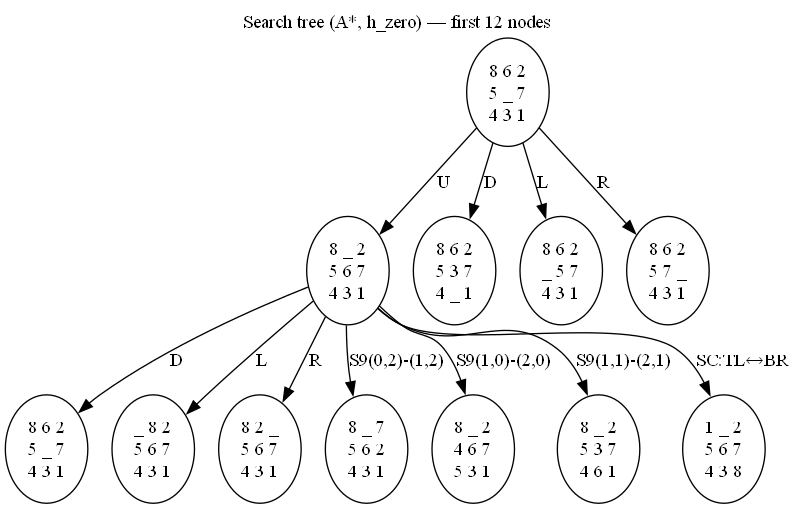

Search tree rendered to: tree_hpair_nodes.png


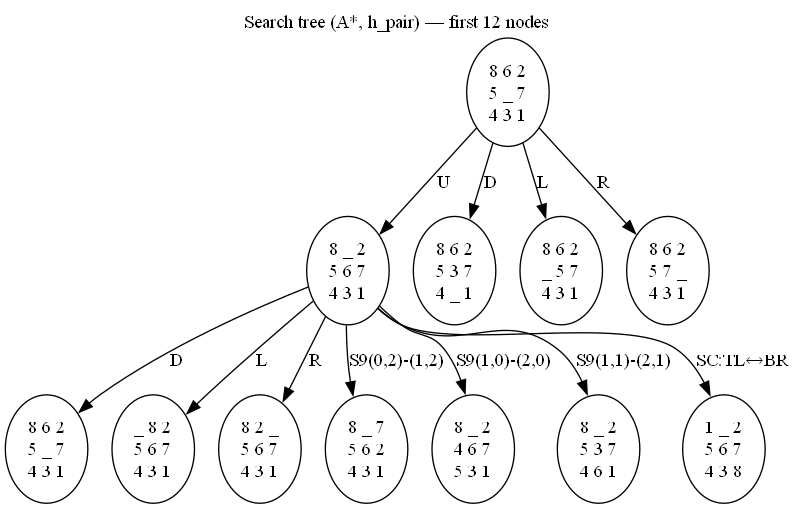

'tree_hpair_nodes.png'

In [128]:
DOT = None  # đặt r"c:\Program Files\Graphviz\bin\dot.exe" nếu cần
render_search_tree_for_heuristic_nodes(
    problem, h_zero, max_nodes=12,
    filename="tree_h0_nodes",
    graph_title="Search tree (A*, h_zero) — first 12 nodes"
)

render_search_tree_for_heuristic_nodes(
    problem, h_pair, max_nodes=12,
    filename="tree_hpair_nodes",
    graph_title="Search tree (A*, h_pair) — first 12 nodes"
)

## 7. Sơ đồ lớp ( Class diagram )
- ### Sơ đồ lớp của thuật toán A* 8 Puzzle
  <p align="center">
    <img src="ClassDiagram.png" alt="Goal state" width="1000"><br>
    <em>Hình 4. Class diagram Astar 8 Puzzle</em>
  </p>